In [27]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_raw=pd.read_csv("./SCALE불량.csv",encoding='euc-kr')
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [13]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [15]:
df_raw.columns 

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [16]:
df_raw=df_raw.drop(["plate_no",'rolling_date'], axis=1, inplace=False)

In [17]:
for i in df_raw.columns:
    print(df_raw[i].value_counts())

양품    690
불량    310
Name: scale, dtype: int64
JS-SM490YB     84
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64
영국     256
일본     187
미국     159
프랑스    143
한국     132
독일      87
공통      36
Name: spec_country, dtype: int64
C    755
T    245
Name: steel_kind, dtype: int64
20     118
13     118
16      67
18      65
15      62
40      59
12      58
14      51
19      43
17      39
38      31
30      29
22      24
23      19
50      18
25      18
76      15
45      14
66      13
74      13
61      12
21      12
24      11
75       9
70       7
32       6
51       6
81       5
35       5
56       5
26       5
44       5
71       4
64       4
55       4
77       3
34       3
90       3
48       3
60       2
33       2
68       2
83       2
100      2
36       1
27       1
80       1
54       1
Name: pt_thick, dtype: int6

<Axes: xlabel='work_group', ylabel='count'>

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51

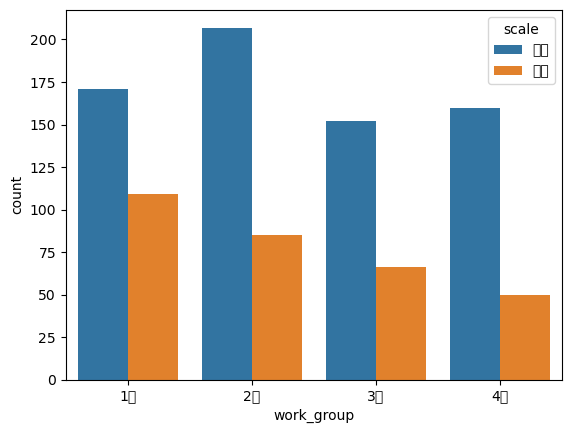

In [30]:
sns.countplot(x='work_group',hue='scale',data=df_raw)

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_

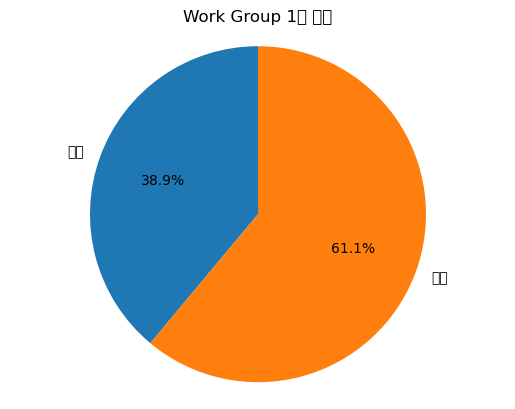

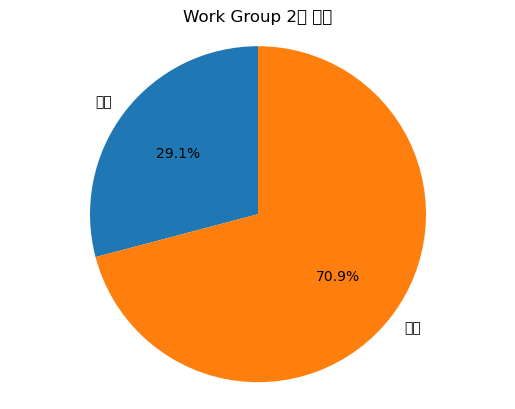

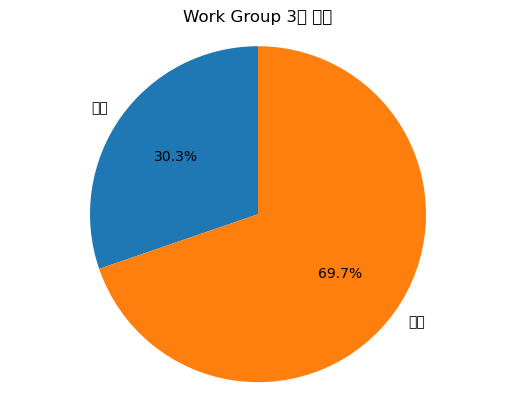

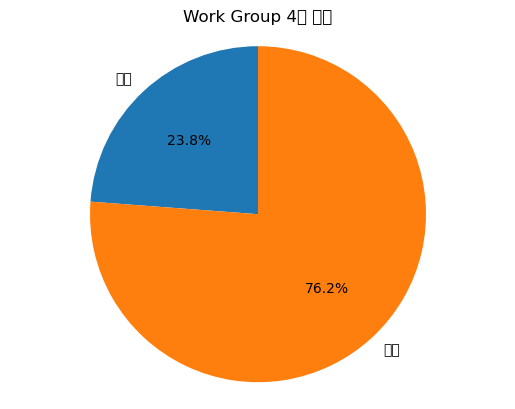

In [31]:
grouped = df_raw.groupby(['work_group', 'scale']).size().unstack(fill_value=0)

# 비율 계산
grouped_ratio = grouped.div(grouped.sum(axis=1), axis=0)

# 파이차트 그리기
for group in grouped_ratio.index:
    plt.figure()
    plt.pie(grouped_ratio.loc[group], labels=grouped_ratio.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Work Group {group} 비율')
    plt.axis('equal')  # 원형으로 표시
    plt.show()